
----
----


## Part 1: Domain Analysis 

The NHS generates and stores an enormous volume of patient and operational data across many services. However, the data currently exists in disparate, unnormalised CSV files, making it difficult to construct a unified view of a patient’s medical history or perform system-wide analyses. This fragmentation impedes the integration of medical records, the tracking of healthcare outcomes, and the evaluation of service effectiveness. For a sector as critical and resource-constrained as healthcare, these limitations are significant. Hospital administrators and policymakers lack the insights necessary to allocate resources efficiently or to implement evidence-based strategies for system-wide improvement. 

This problem however is well suited to data science solutions, which provide tools to clean, integrate, and structure scattered data, such as the NHS’s unnormalised CSV files. It enables pattern detection through statistics, prediction by machine learning, and insight delivery via visualisation. These techniques can transform disconnected records into actionable intelligence for improving care quality and informing decisions, addressing the NHS’s need for integrated, evidence-based healthcare management.

Under such capabilities, the aim is to improve patient care, optimise resource utilisation, and implement data-informed decision-making. Specifically, the investigation will focus on:
- Predicting hospital readmissions
- Personalising treatment plans
- Identifying high-risk patients
- Analysing the effectiveness of different medical interventions

To address the challenges posed, an effective starting point would be to design a fully normalised relational database that integrates the records. Building on this foundation, data modelling techniques could be applied to carry out the aims highlighted above. Clustering methods may help uncover patterns among patient groups, while statistical analyses can highlight factors influencing care effectiveness. These insights could then be communicated through clear visualisations to support decision-making by NHS administrators and clinicians.


----
----


## Part 2: Database Design 


<div align="center">

# <u> ER Diagram</u>

</div>

---

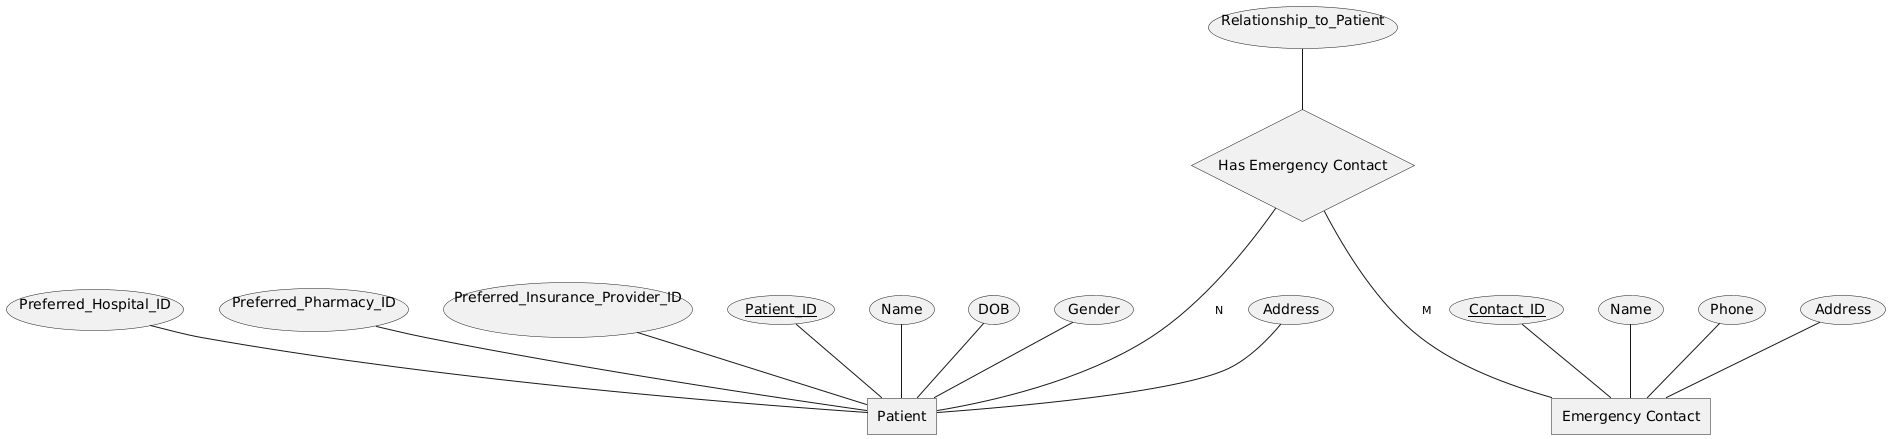

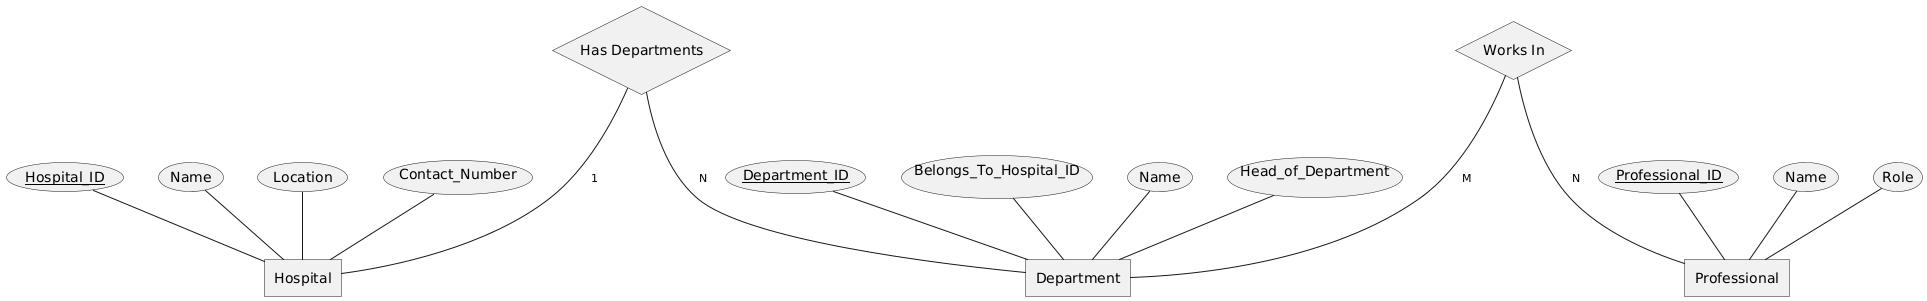

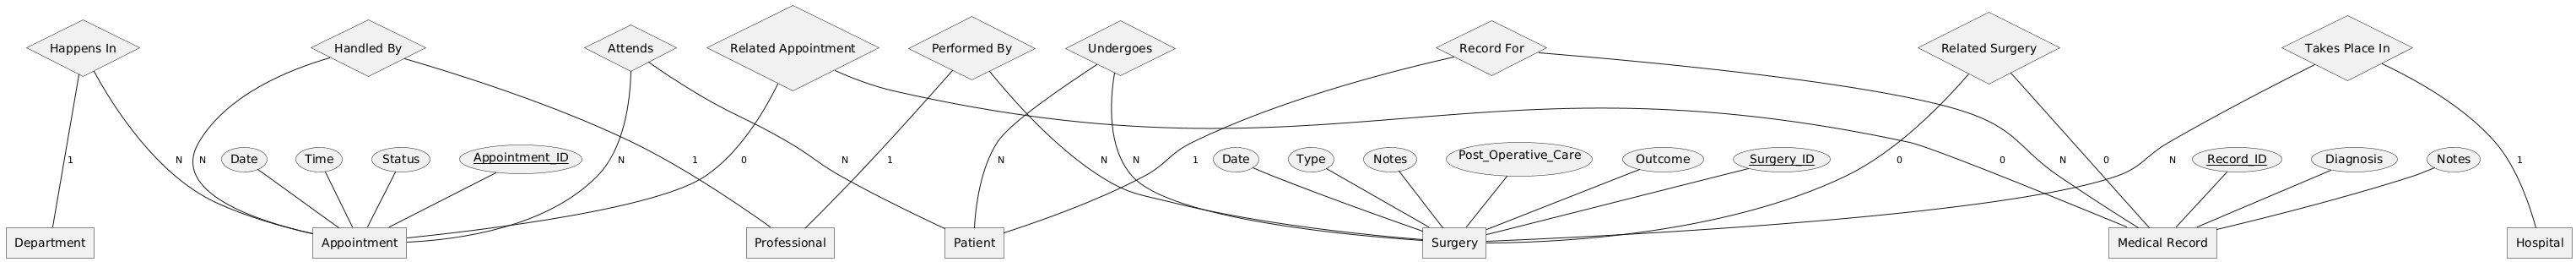

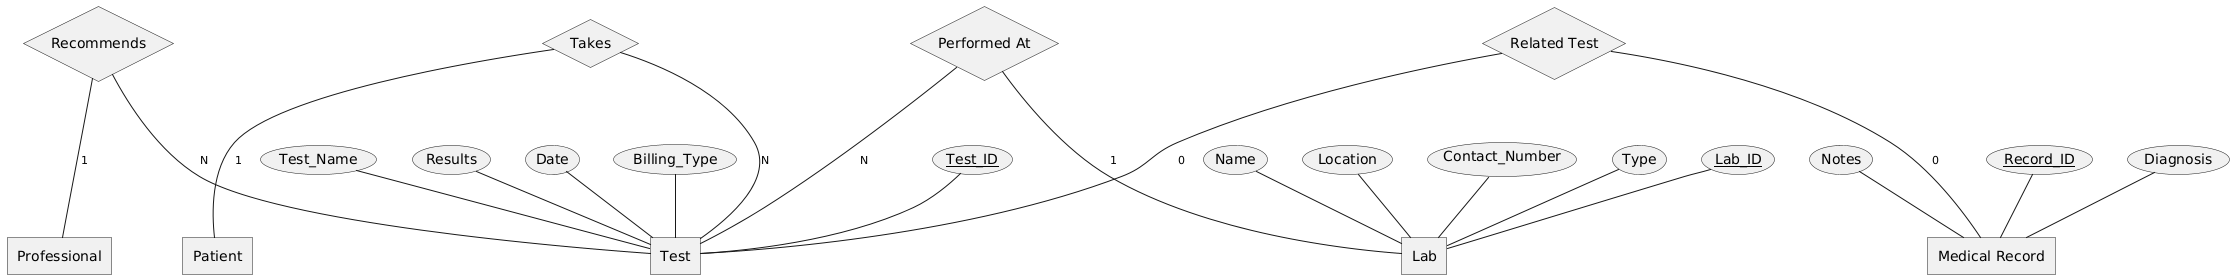

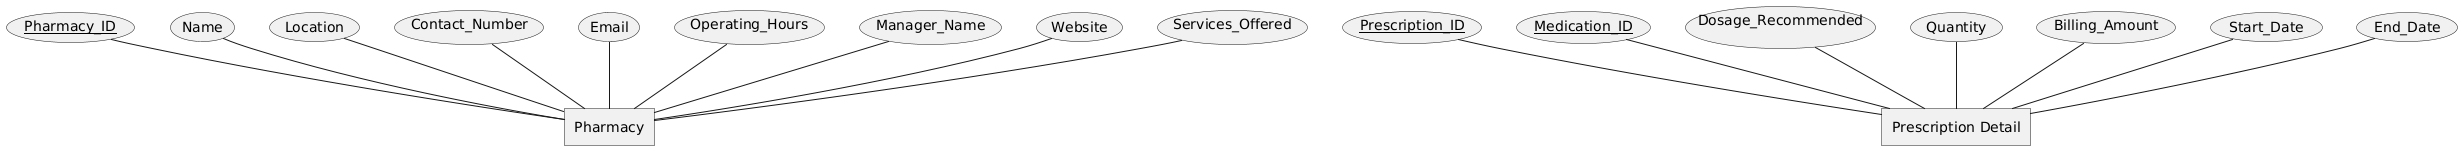

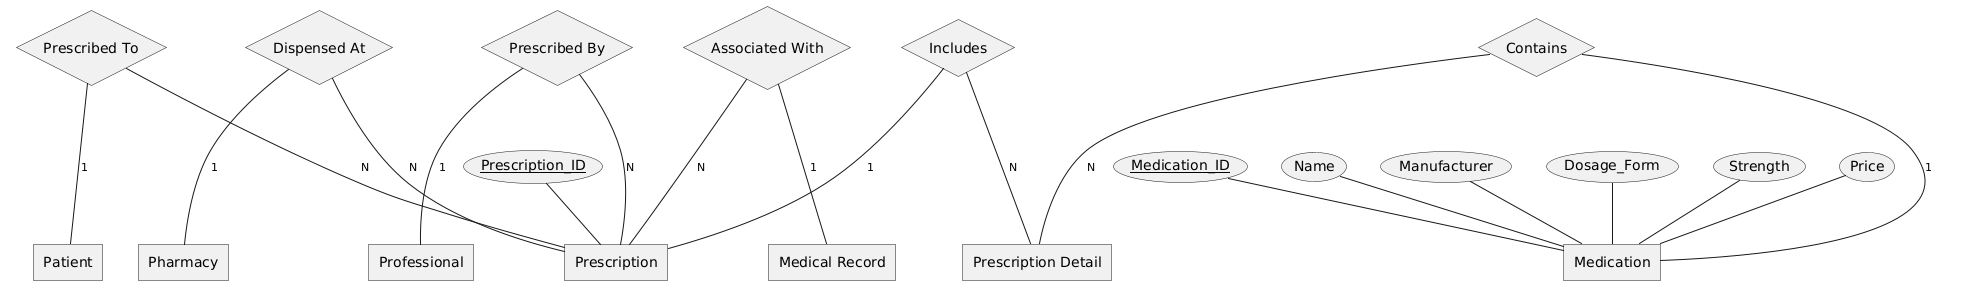

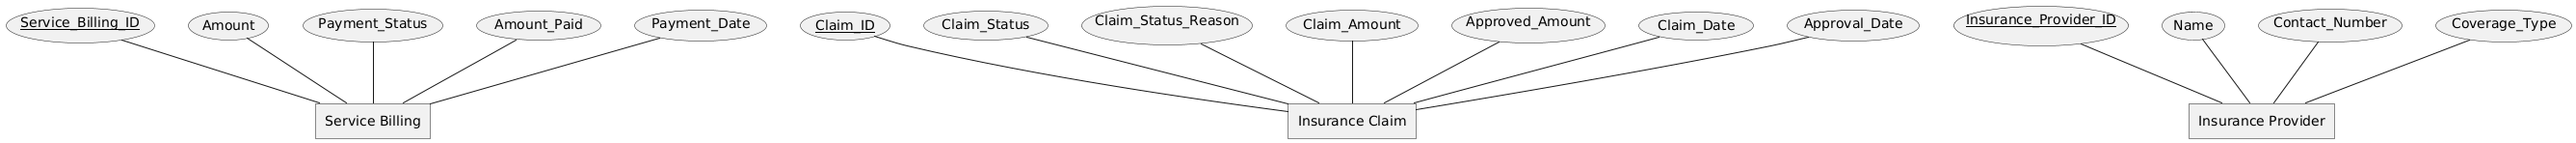

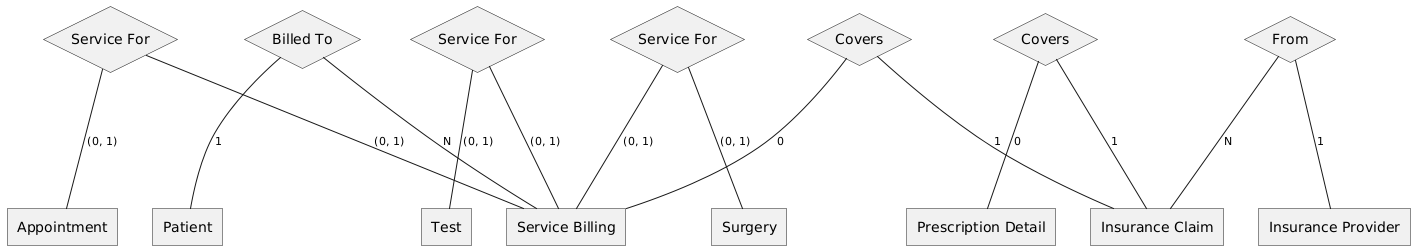

<div align="center">

# <u>Normalisation</u>

</div>

---


### Table 1: `appointments_data`

**Composite Primary Key**: [<u>Appointment_ID</u>, <u>Department_ID</u>, <u>Emergency_Contact_Name</u>]

#### Functional Dependencies:
- `Appointment_Date`, `Appointment_Time`, and `Appointment_Status` depend only on `Appointment_ID`.
- `Patient_Name`, `Patient_Date_Of_Birth`, `Patient_Gender`, `Patient_Address`, `Patient_Preferred_Hospital_ID`, `Patient_Prefered_Pharmacy_ID`, and `Patient_Preferred_Insurance_Provider` depend only on `Patient_ID`.
- `Emergency_Contact_Name`, `Emergency_Contact_Relationship`, `Emergency_Contact_Phone`, and `Emergency_Contact_Address` depend only on the surrogate key `Emergency_Contact_ID`, which uniquely identifies each Emergency Contact as an independent entity.
- `Professional_Name` and `Professional_Role` depend only on the surrogate key `Professional_ID`, which uniquely identifies each Professional.
- `Department_Name` and `Head_of_Department` depend only on `Department_ID`.
- `Hospital_Name`, `Hospital_Location`, and `Hospital_Contact` depend only on `Hospital_ID`.

---

### Tables in 2NF (and 3NF)

#### `Patient`

| Column Name                           | Key           |
|--------------------------------------|----------------|
| [<u>Patient_ID</u>]                  | PK             |
| Patient_Name                          |                |
| Patient_Date_Of_Birth                 |                |
| Patient_Gender                        |                |
| Patient_Address                       |                |
| [*Patient_Preferred_Hospital_ID*]    | FK             |
| [*Patient_Preferred_Pharmacy_ID*]    | FK             |
| [*Patient_Preferred_Insurance_Provider*] | FK         |

---

#### `Emergency_Contact`

| Column Name              | Key |
|--------------------------|-----|
| [<u>Emergency_Contact_ID</u>] | PK  |
| Emergency_Contact_Name   |     |
| Emergency_Contact_Relationship | |
| Emergency_Contact_Phone  |     |
| Emergency_Contact_Address|     |

---

#### `Patient_Emergency_Contact`

| Column Name                      | Key     |
|----------------------------------|---------|
| [<u>*Patient_ID*</u>]           | PK, FK  |
| [<u>*Emergency_Contact_ID*</u>] | PK, FK  |

---

#### `Hospital`

| Column Name         | Key |
|---------------------|-----|
| [<u>Hospital_ID</u>] | PK  |
| Hospital_Name        |     |
| Hospital_Location    |     |

---

#### `Department`

| Column Name        | Key |
|--------------------|-----|
| [<u>Department_ID</u>] | PK  |
| Department_Name     |     |
| Head_of_Department  |     |
| [*Hospital_ID*]     | FK  |

---

#### `Professional`

| Column Name          | Key |
|----------------------|-----|
| [<u>Professional_ID</u>] | PK  |
| Professional_Name     |     |
| Professional_Role     |     |

---

#### `Appointments`

| Column Name        | Key     |
|--------------------|---------|
| [<u>Appointment_ID</u>] | PK  |
| Appointment_Date    |        |
| Appointment_Time    |        |
| Appointment_Status  |        |
| [*Patient_ID*]      | FK     |
| [*Professional_ID*] | FK     |

---

#### `Appointment_Department`

| Column Name            | Key     |
|------------------------|---------|
| [<u>*Appointment_ID*</u>] | PK, FK  |
| [<u>*Department_ID*</u>]  | PK, FK  |

---

Since no transitive dependencies were found, the 2NF table design above satisfies 3NF.


### Table 2: `Prescription_Billing_Insurance_Data`

**Primary Key**: [<u>Prescription_Detail_ID</u>]

The table is already in 2NF because it uses a single-column primary key.  
2NF addresses partial dependencies, which occur in tables with **composite** primary keys — not applicable here.

---

#### Transitive Dependencies

- `Prescription_Detail_ID` → `Prescription_ID` → `Record_ID`
- `Prescription_Detail_ID` → `Prescription_ID` → `Pharmacy_ID` →  
  `Pharmacy_Name`, `Pharmacy_Location`, `Pharmacy_Contact`, `Pharmacy_Email`, `Pharmacy_Operating_Hours`,  
  `Pharmacy_Manager_Name`, `Pharmacy_Website`, `Pharmacy_Services_Offered`
- `Prescription_Detail_ID` → `Medication_ID` →  
  `Medication_Name`, `Manufacturer`, `Medication_Dosage_Form`, `Medication_Strength`, `Medication_Price`
- `Prescription_Detail_ID` → `Claim_ID` →  
  `Claim_Status`, `Claim_Status_Reason`, `Claim_Amount`, `Approved_Amount`, `Claim_Date`,  
  `Approval_Date`, `Insurance_Provider_ID`
- `Claim_ID` → `Insurance_Provider_ID` →  
  `Insurance_Provider_Name`, `Insurance_Provider_Contact`, `Insurance_Provider_Coverage_Type`

---

### Tables in 3NF

#### `Pharmacy`

| Column Name                | Key |
|----------------------------|-----|
| [<u>Pharmacy_ID</u>]       | PK  |
| Pharmacy_Name              |     |
| Pharmacy_Location          |     |
| Pharmacy_Contact           |     |
| Pharmacy_Email             |     |
| Pharmacy_Operating_Hours   |     |
| Pharmacy_Manager_Name      |     |
| Pharmacy_Website           |     |
| Pharmacy_Services_Offered  |     |

---

#### `Medication`

| Column Name              | Key |
|--------------------------|-----|
| [<u>Medication_ID</u>]   | PK  |
| Medication_Name          |     |
| Manufacturer             |     |
| Medication_Dosage_Form   |     |
| Medication_Strength      |     |
| Medication_Price         |     |

---

#### `Insurance_Provider`

| Column Name                     | Key |
|----------------------------------|-----|
| [<u>Insurance_Provider_ID</u>]  | PK  |
| Insurance_Provider_Name         |     |
| Insurance_Provider_Contact      |     |
| Insurance_Provider_Coverage_Type|     |

---

#### `Claim`

| Column Name                 | Key |
|-----------------------------|-----|
| [<u>Claim_ID</u>]           | PK  |
| Claim_Status                |     |
| Claim_Status_Reason         |     |
| Claim_Amount                |     |
| Approved_Amount             |     |
| Claim_Date                  |     |
| Approval_Date               |     |
| [*Insurance_Provider_ID*]   | FK  |

---

#### `Prescription`

| Column Name         | Key |
|---------------------|-----|
| [<u>Prescription_ID</u>] | PK  |
| Record_ID            |     |
| [*Pharmacy_ID*]      | FK  |

---

#### `Prescription_Detail`

| Column Name                           | Key     |
|---------------------------------------|---------|
| [<u>Prescription_Detail_ID</u>]       | PK      |
| Medication_Dosage                     |         |
| Medication_Quantity                   |         |
| Total_Medication_Billing_Amount       |         |
| Dosage_Start_Date                     |         |
| Dosage_End_Date                       |         |
| [*Prescription_ID*]                   | FK      |
| [*Medication_ID*]                     | FK      |
| [*Claim_ID*]                          | FK      |


### Table 3: `Service_Billing_Insurance_Data`

**Primary Key**: [<u>Service_Billing_ID</u>]

The table is already in 2NF because it uses a single-column primary key.  
2NF addresses partial dependencies, which apply only to composite primary keys.

---

#### Transitive Dependencies

- `Claim_ID` → `Insurance_Provider_ID` →  `Insurance_Provider_Name`, `Insurance_Provider_Contact`, `Insurance_Provider_Coverage_Type`

---

#### Other Dependencies

- `Claim_ID` →  `Claim_Status`, `Claim_Status_Reason`, `Claim_Amount`, `Approved_Amount`,  `Claim_Date`, `Approval_Date`

---

### Tables in 3NF

---

#### `Insurance_Provider`

> Same as the one previously created and so I will omit this one.

| Column Name                     | Key |
|----------------------------------|-----|
| [<u>Insurance_Provider_ID</u>]  | PK  |
| Insurance_Provider_Name         |     |
| Insurance_Provider_Contact      |     |
| Insurance_Provider_Coverage_Type|     |

---

#### `Claim`

> Same as in Table 2, with one additional foreign key: `[*Service_Billing_ID*]`

| Column Name                  | Key     |
|------------------------------|---------|
| [<u>Claim_ID</u>]            | PK      |
| Claim_Status                 |         |
| Claim_Status_Reason          |         |
| Claim_Amount                 |         |
| Approved_Amount              |         |
| Claim_Date                   |         |
| Approval_Date                |         |
| [*Insurance_Provider_ID*]    | FK      |
| [*Service_Billing_ID*]       | FK      |

---

#### `ServiceBilling`

| Column Name                        | Key     |
|------------------------------------|---------|
| [<u>Service_Billing_ID</u>]        | PK      |
| Service_Billing_Amount             |         |
| Service_Billing_Payment_Status     |         |
| Service_Billing_Amount_Paid        |         |
| Service_Billing_Payment_Date       |         |
| [*Appointment_ID*]                 | FK      |
| [*Surgery_ID*]                     | FK      |
| [*Test_ID*]                        | FK      |


### Table 4: `Medical_Appointments_Data`

**Primary Key**: [<u>Record_ID</u>]

The table is already in 2NF because it uses a single-column primary key.  
2NF resolves partial dependencies, which only affect composite keys.

---

#### Transitive Dependencies Violating 3NF

- `Record_ID` → `Appointment_ID` →  `Patient_ID`, `Appointment_Date`, `Appointment_Time`, `Appointment_Status`

This implies a transitive dependency. To resolve this and achieve 3NF, the `Appointment` data should be extracted into a separate table.

> However, a table for appointments has already been defined under `appointments_data.csv` in a previous section, so a new `Appointments` table will not be created here.

---

### Table in 3NF

#### `MedicalRecord`

> This table is not going to be implemented, as the next CSV file contains a more informative version with an additional foreign key.

| Column Name          | Key     |
|----------------------|---------|
| [<u>Record_ID</u>]   | PK      |
| Diagnosis            |         |
| Notes                |         |
| [*Surgery_ID*]       | FK      |
| [*Test_ID*]          | FK      |
| [*Appointment_ID*]   | FK      |


### Table 5: `Medical_Surgeries_Data`

**Primary Key**: [<u>Record_ID</u>]

As before, the table is already in 2NF because it has a single-column primary key.  
2NF addresses partial dependencies, which only apply to composite primary keys.

---

#### Transitive Dependencies Violating 3NF

- `Record_ID` → `Surgery_ID` →  All surgery-related details (e.g., `Surgery_Date`, `Surgery_Type`, etc.)

To eliminate this transitive dependency, surgery details must be separated into their own table.

---

### Tables in 3NF

#### `Surgery`

| Column Name                     | Key |
|----------------------------------|-----|
| [<u>Surgery_ID</u>]             | PK  |
| Surgery_Date                    |     |
| Surgery_Type                    |     |
| Surgery_Notes                   |     |
| Surgery_Post_Operative_Care     |     |
| Surgery_Outcome                 |     |
| [*Surgery_Professional_ID*]     | FK  |
| [*Surgery_Hospital_ID*]         | FK  |

---

#### `MedicalRecord`

> This replaces the previously defined `MedicalRecord` table (Table 4) with additional foreign keys, and only this version is implemented.

| Column Name          | Key     |
|----------------------|---------|
| [<u>Record_ID</u>]   | PK      |
| Diagnosis            |         |
| Notes                |         |
| [*Test_ID*]          | FK      |
| [*Patient_ID*]       | FK      |
| [*Appointment_ID*]   | FK      |
| [*Surgery_ID*]       | FK      |


### Table 6: `Medical_Tests_Data`

**Primary Key**: [<u>Record_ID</u>]

As before, the table is already in 2NF because it has a single-column primary key.  
2NF addresses partial dependencies, which only apply to composite primary keys.

---

#### Transitive Dependencies Violating 3NF

- `Record_ID` → `Test_ID` →  All test-related details (e.g., `Test_Name`, `Test_Results`, etc.)

- `Test_ID` → `Lab_ID` →  All lab-related details (e.g., `Lab_Name`, `Lab_Location`, etc.)

To remove these transitive dependencies and satisfy 3NF, both test and lab details must be separated into their own tables.

---

### Tables in 3NF

#### `MedicalRecord`

> This table was previously defined (in Table 5) and will not be implemented again here.

| Column Name          | Key     |
|----------------------|---------|
| [<u>Record_ID</u>]   | PK      |
| Diagnosis            |         |
| Notes                |         |
| [*Test_ID*]          | FK      |
| [*Patient_ID*]       | FK      |
| [*Appointment_ID*]   | FK      |
| [*Surgery_ID*]       | FK      |

---

#### `Test`

| Column Name                             | Key |
|------------------------------------------|-----|
| [<u>Test_ID</u>]                        | PK  |
| Test_Name                               |     |
| Test_Results                            |     |
| Test_Date                               |     |
| Test_Billing_Type                       |     |
| [*Test_Recommended_By_Professional_ID*] | FK  |
| [*Lab_ID*]                              | FK  |

---

#### `Lab`

| Column Name        | Key |
|---------------------|-----|
| [<u>Lab_ID</u>]     | PK  |
| Lab_Name            |     |
| Lab_Location        |     |
| Lab_Contact         |     |
| Lab_Type            |     |


<div align="center">

# <u>SQLite Implementation</u>

</div>

---

### Insertion Order Plan

To avoid foreign key errors during data insertion, parent records must be inserted before child records. This ensures all foreign key references are valid at the time of insertion. Below is my order for inserting data into the normalised schema, based on foreign key dependencies:

---

#### Independent Entities
Start with tables that do not have foreign keys:
- `Hospital`
- `Pharmacy`
- `Insurance_Provider`
- `Lab`
- `Medication`

---

#### Dependent Entities
Next, insert into tables that depend on Tier 1:
- `Department` (needs `Hospital_ID`)
- `Professional` (then link to departments via `Professional_Department`)
- `Patient` (needs FKs to `Hospital`, `Pharmacy`, `Insurance_Provider`)
- `Emergency_Contact`
- `Patient_Emergency_Contact` (M:N relationship)

---

#### Medical Events
Once core participants and facilities are set up:
- `Appointment` (needs `Patient_ID`, `Professional_ID`)
- `Appointment_Department`
- `Surgery`, `Test` (needs professionals, hospitals, and labs)

---

#### Records, Prescriptions, Billing
Finally, insert data that ties everything together:
- `MedicalRecord`
- `Prescription`, `Prescription_Detail`
- `ServiceBilling`, `Claim`

---

### Step 1: Load Raw CSV Files and Initialize SQLite Database

In [320]:
import pandas as pd
import sqlite3
import os

csv_dir = r"C:\Users\User\Documents\C. University\Modules\2nd Year\Semester 2\Data\Coursework\CSV_Files"  
db_path = "DATA_Assessment.sqlite"

conn = sqlite3.connect(db_path)
cursor = conn.cursor()

appointments_df = pd.read_csv(os.path.join(csv_dir, "appointments_data.csv"))
prescriptions_df = pd.read_csv(os.path.join(csv_dir, "prescription_billing_insurance_data.csv"))
service_billing_df = pd.read_csv(os.path.join(csv_dir, "service_billing_insurance_data.csv"), low_memory=False)
med_appointments_df = pd.read_csv(os.path.join(csv_dir, "medical_appointments_data.csv"))
med_surgeries_df = pd.read_csv(os.path.join(csv_dir, "medical_surgeries_data.csv"))
med_tests_df = pd.read_csv(os.path.join(csv_dir, "medical_tests_data.csv"))

### Step 2: Implement Independent Entities

In [322]:
# Hospital Table

cursor.execute("DROP TABLE IF EXISTS Hospital"); 
cursor.execute("""
CREATE TABLE IF NOT EXISTS Hospital (
    Hospital_ID TEXT PRIMARY KEY,
    Hospital_Name TEXT,
    Hospital_Location TEXT 
);
""");

hospitals_all = appointments_df[['Hospital_ID', 'Hospital_Name', 'Hospital_Location']].drop_duplicates()
hospitals_all.to_sql("Hospital", conn, if_exists='append', index=False);

# Pharmacy Table

cursor.execute("DROP TABLE IF EXISTS Pharmacy"); 
cursor.execute("""
CREATE TABLE IF NOT EXISTS Pharmacy (
    Pharmacy_ID TEXT PRIMARY KEY,
    Pharmacy_Name TEXT,
    Pharmacy_Location TEXT,
    Pharmacy_Contact TEXT,
    Pharmacy_Email TEXT,
    Pharmacy_Operating_Hours TEXT,
    Pharmacy_Manager_Name TEXT,
    Pharmacy_Website TEXT,
    Pharmacy_Services_Offered TEXT
);
""");

pharmacy_df = prescriptions_df[['Pharmacy_ID', 'Pharmacy_Name', 'Pharmacy_Location', 'Pharmacy_Contact', 'Pharmacy_Email', 'Pharmacy_Operating_Hours', 
                                'Pharmacy_Manager_Name', 'Pharmacy_Website', 'Pharmacy_Services_Offered']].drop_duplicates()
pharmacy_df.to_sql("Pharmacy", conn, if_exists='append', index=False);

# Medication Table
cursor.execute("DROP TABLE IF EXISTS Medication"); 
cursor.execute("""
CREATE TABLE IF NOT EXISTS Medication (
    Medication_ID TEXT PRIMARY KEY,
    Medication_Name TEXT,
    Manufacturer TEXT,
    Medication_Dosage_Form TEXT,
    Medication_Strength TEXT,
    Medication_Price REAL 
);
""");

medication_df = prescriptions_df[['Medication_ID', 'Medication_Name', 'Manufacturer', 'Medication_Dosage_Form', 'Medication_Strength', 
                                  'Medication_Price']].drop_duplicates()
medication_df.to_sql("Medication", conn, if_exists='append', index=False);

# Insurance_Provider Table

cursor.execute("DROP TABLE IF EXISTS Insurance_Provider"); 
cursor.execute("""
CREATE TABLE IF NOT EXISTS Insurance_Provider (
    Insurance_Provider_ID TEXT PRIMARY KEY,
    Insurance_Provider_Name TEXT,
    Insurance_Provider_Contact TEXT,
    Insurance_Provider_Coverage_Type TEXT
);
""");

insurance_df = prescriptions_df[['Insurance_Provider_ID', 'Insurance_Provider_Name', 'Insurance_Provider_Contact', 
                                 'Insurance_Provider_Coverage_Type']].drop_duplicates()
insurance_df.to_sql("Insurance_Provider", conn, if_exists='append', index=False);

# Lab Table

cursor.execute("DROP TABLE IF EXISTS Lab"); 
cursor.execute("""
CREATE TABLE IF NOT EXISTS Lab (
    Lab_ID TEXT PRIMARY KEY,
    Lab_Name TEXT NULL,
    Lab_Location TEXT NULL,
    Lab_Contact TEXT NULL,
    Lab_Type TEXT NULL
);
""");

lab_df = med_tests_df[['Lab_ID', 'Lab_Name', 'Lab_Location', 'Lab_Contact', 'Lab_Type']].drop_duplicates()
lab_df.to_sql("Lab", conn, if_exists='append', index=False);

### Step 3: Implement Dependent Entities

In [324]:
# Patient Table

cursor.execute("DROP TABLE IF EXISTS Patient");
cursor.execute("""
CREATE TABLE IF NOT EXISTS Patient (
    Patient_ID TEXT PRIMARY KEY,
    Patient_Name TEXT,
    Patient_Date_Of_Birth TEXT,
    Patient_Gender TEXT,
    Patient_Address TEXT,
    Patient_Preferred_Hospital_ID TEXT,
    Patient_Preferred_Pharmacy_ID TEXT,
    Patient_Preferred_Insurance_Provider TEXT,
    FOREIGN KEY (Patient_Preferred_Hospital_ID) REFERENCES Hospital(Hospital_ID),
    FOREIGN KEY (Patient_Preferred_Pharmacy_ID) REFERENCES Pharmacy(Pharmacy_ID),
    FOREIGN KEY (Patient_Preferred_Insurance_Provider) REFERENCES Insurance_Provider(Insurance_Provider_ID)
);
""");

patient_df = appointments_df[['Patient_ID', 'Patient_Name', 'Patient_Date_Of_Birth', 'Patient_Gender', 'Patient_Address',
                              'Patient_Preferred_Hospital_ID', 'Patient_Preferred_Pharmacy_ID', 'Patient_Preferred_Insurance_Provider'
                             ]].drop_duplicates()
patient_df.to_sql("Patient", conn, if_exists='append', index=False);

# Department Table

cursor.execute("DROP TABLE IF EXISTS Department");
cursor.execute("""
CREATE TABLE IF NOT EXISTS Department (
    Department_ID TEXT PRIMARY KEY,
    Department_Name TEXT,
    Head_of_Department TEXT,
    Hospital_ID TEXT,
    FOREIGN KEY (Hospital_ID) REFERENCES Hospital(Hospital_ID)
);
""");

department_df = appointments_df[['Department_ID', 'Department_Name', 'Head_of_Department', 'Hospital_ID']].drop_duplicates()
department_df.to_sql("Department", conn, if_exists='append', index=False);

# Professional Table

cursor.execute("DROP TABLE IF EXISTS Professional");
cursor.execute("""
CREATE TABLE IF NOT EXISTS Professional (
    Professional_ID TEXT PRIMARY KEY,
    Professional_Name TEXT,
    Professional_Role TEXT
);
""");

professional_df = appointments_df[['Professional_Name', 'Professional_Role']].drop_duplicates().reset_index(drop=True)
professional_df['Professional_ID'] = ['PRO' + str(i+1).zfill(4) for i in range(len(professional_df))]
professional_df = professional_df[['Professional_ID', 'Professional_Name', 'Professional_Role']]
professional_df.to_sql("Professional", conn, if_exists='append', index=False);

appointments_df = appointments_df.merge(professional_df, on=['Professional_Name', 'Professional_Role'], how='left')

# Emergency_Contact Table

cursor.execute("DROP TABLE IF EXISTS Emergency_Contact");
cursor.execute("""
CREATE TABLE IF NOT EXISTS Emergency_Contact (
    Emergency_Contact_ID TEXT PRIMARY KEY,
    Emergency_Contact_Name TEXT,
    Emergency_Contact_Relationship TEXT,
    Emergency_Contact_Phone TEXT,
    Emergency_Contact_Address TEXT
);
""");

emergency_df = appointments_df[['Emergency_Contact_Name', 'Emergency_Contact_Relationship', 'Emergency_Contact_Phone', 
                                'Emergency_Contact_Address']].drop_duplicates().reset_index(drop=True)
emergency_df['Emergency_Contact_ID'] = ['EC' + str(i+1).zfill(4) for i in range(len(emergency_df))]
emergency_df = emergency_df[['Emergency_Contact_ID', 'Emergency_Contact_Name', 'Emergency_Contact_Relationship', 'Emergency_Contact_Phone', 
                             'Emergency_Contact_Address']]
emergency_df.to_sql("Emergency_Contact", conn, if_exists='append', index=False);

appointments_df = appointments_df.merge(emergency_df, on=['Emergency_Contact_Name', 'Emergency_Contact_Relationship', 'Emergency_Contact_Phone', 
                                                          'Emergency_Contact_Address'], how='left')

# Patient_Emergency_Contact Table

cursor.execute("DROP TABLE IF EXISTS Patient_Emergency_Contact");
cursor.execute("""
CREATE TABLE IF NOT EXISTS Patient_Emergency_Contact (
    Patient_ID TEXT,
    Emergency_Contact_ID TEXT,
    PRIMARY KEY (Patient_ID, Emergency_Contact_ID),
    FOREIGN KEY (Patient_ID) REFERENCES Patient(Patient_ID),
    FOREIGN KEY (Emergency_Contact_ID) REFERENCES Emergency_Contact(Emergency_Contact_ID)
);
""");

patient_emergency_df = appointments_df[['Patient_ID', 'Emergency_Contact_ID']].drop_duplicates()
patient_emergency_df.to_sql("Patient_Emergency_Contact", conn, if_exists='append', index=False);

### Step 4: Implement Medical Events

In [326]:
# Appointment Table

cursor.execute("DROP TABLE IF EXISTS Appointment");
cursor.execute("""
CREATE TABLE IF NOT EXISTS Appointment (
    Appointment_ID TEXT PRIMARY KEY,
    Appointment_Date TEXT,
    Appointment_Time TEXT,
    Appointment_Status TEXT,
    Patient_ID TEXT,
    Professional_ID TEXT,
    FOREIGN KEY (Patient_ID) REFERENCES Patient(Patient_ID),
    FOREIGN KEY (Professional_ID) REFERENCES Professional(Professional_ID)
);
""");

appointment_df = appointments_df[['Appointment_ID', 'Appointment_Date', 'Appointment_Time', 'Appointment_Status', 'Patient_ID', 
                                  'Professional_ID']].drop_duplicates()

appointment_df.to_sql("Appointment", conn, if_exists='append', index=False);

# Appointment_Department Table

cursor.execute("DROP TABLE IF EXISTS Appointment_Department");
cursor.execute("""
CREATE TABLE IF NOT EXISTS Appointment_Department (
    Appointment_ID TEXT,
    Department_ID TEXT,
    PRIMARY KEY (Appointment_ID, Department_ID),
    FOREIGN KEY (Appointment_ID) REFERENCES Appointment(Appointment_ID),
    FOREIGN KEY (Department_ID) REFERENCES Department(Department_ID)
);
""");

appt_dept_df = appointments_df[['Appointment_ID', 'Department_ID']].drop_duplicates()
appt_dept_df.to_sql("Appointment_Department", conn, if_exists='append', index=False);

# Surgery Table

cursor.execute("DROP TABLE IF EXISTS Surgery");
cursor.execute("""
CREATE TABLE IF NOT EXISTS Surgery (
    Surgery_ID TEXT PRIMARY KEY,
    Surgery_Date TEXT,
    Surgery_Type TEXT,
    Surgery_Notes TEXT,
    Surgery_Post_Operative_Care TEXT,
    Surgery_Outcome TEXT,
    Surgery_Professional_ID TEXT,
    Surgery_Hospital_ID TEXT,
    FOREIGN KEY (Surgery_Hospital_ID) REFERENCES Hospital(Hospital_ID)
);
""");

surgery_df = med_surgeries_df[['Surgery_ID', 'Surgery_Date', 'Surgery_Type', 'Surgery_Notes', 'Surgery_Post_Operative_Care', 'Surgery_Outcome',
                                   'Surgery_Professional_ID', 'Surgery_Hospital_ID']].drop_duplicates()
surgery_df.to_sql("Surgery", conn, if_exists='append', index=False);

# Test Table

cursor.execute("DROP TABLE IF EXISTS Test");
cursor.execute("""
CREATE TABLE IF NOT EXISTS Test (
    Test_ID TEXT PRIMARY KEY,
    Test_Name TEXT,
    Test_Results TEXT,
    Test_Date TEXT,
    Test_Billing_Type TEXT,
    Test_Recommended_By_Professional_ID TEXT,
    Lab_ID TEXT,
    FOREIGN KEY (Test_Recommended_By_Professional_ID) REFERENCES Professional(Professional_ID),
    FOREIGN KEY (Lab_ID) REFERENCES Lab(Lab_ID)
);
""");

test_df = med_tests_df[['Test_ID', 'Test_Name', 'Test_Results', 'Test_Date', 'Test_Billing_Type', 'Test_Recommended_By_Professional_ID', 
                            'Lab_ID']].drop_duplicates()
test_df.to_sql("Test", conn, if_exists='append', index=False);

### Step 5: Records, Prescriptions, Billing

In [328]:
# MedicalRecord Table

cursor.execute("DROP TABLE IF EXISTS MedicalRecord");
cursor.execute("""
CREATE TABLE IF NOT EXISTS MedicalRecord (
    Record_ID TEXT PRIMARY KEY,
    Diagnosis TEXT,
    Notes TEXT,
    Test_ID TEXT,
    Patient_ID TEXT,
    Appointment_ID TEXT,
    Surgery_ID TEXT,
    FOREIGN KEY (Test_ID) REFERENCES Test(Test_ID),
    FOREIGN KEY (Patient_ID) REFERENCES Patient(Patient_ID),
    FOREIGN KEY (Appointment_ID) REFERENCES Appointment(Appointment_ID),
    FOREIGN KEY (Surgery_ID) REFERENCES Surgery(Surgery_ID)
);
""");

medical_record_df = med_surgeries_df[['Record_ID', 'Diagnosis', 'Notes', 'Test_ID', 'Patient_ID', 'Appointment_ID', 'Surgery_ID']].drop_duplicates()
medical_record_df.to_sql("MedicalRecord", conn, if_exists='append', index=False);

# Prescription Table

cursor.execute("DROP TABLE IF EXISTS Prescription");
cursor.execute("""
CREATE TABLE IF NOT EXISTS Prescription (
    Prescription_ID TEXT PRIMARY KEY,
    Record_ID TEXT,
    Pharmacy_ID TEXT,
    FOREIGN KEY (Pharmacy_ID) REFERENCES Pharmacy(Pharmacy_ID)
);
""");

prescription_df = prescriptions_df[['Prescription_ID', 'Record_ID', 'Pharmacy_ID']].drop_duplicates()
prescription_df.to_sql("Prescription", conn, if_exists='append', index=False);

# ServiceBilling Table

cursor.execute("DROP TABLE IF EXISTS ServiceBilling");
cursor.execute("""
CREATE TABLE IF NOT EXISTS ServiceBilling (
    Service_Billing_ID TEXT PRIMARY KEY,
    Service_Billing_Amount REAL,
    Service_Billing_Payment_Status TEXT,
    Service_Billing_Amount_Paid REAL,
    Service_Billing_Payment_Date TEXT,
    Appointment_ID TEXT,
    Surgery_ID TEXT,
    Test_ID TEXT,
    FOREIGN KEY (Appointment_ID) REFERENCES Appointment(Appointment_ID),
    FOREIGN KEY (Surgery_ID) REFERENCES Surgery(Surgery_ID),
    FOREIGN KEY (Test_ID) REFERENCES Test(Test_ID)
);
""");

service_billing_df_cleaned = service_billing_df[['Service_Billing_ID', 'Service_Billing_Amount', 'Service_Billing_Payment_Status', 
                                                 'Service_Billing_Amount_Paid', 'Service_Billing_Payment_Date', 'Appointment_ID', 
                                                 'Surgery_ID', 'Test_ID']].drop_duplicates()
service_billing_df_cleaned.to_sql("ServiceBilling", conn, if_exists='append', index=False);

# Claim Table

cursor.execute("DROP TABLE IF EXISTS Claim");
cursor.execute("""
CREATE TABLE IF NOT EXISTS Claim (
    Claim_ID TEXT PRIMARY KEY,
    Claim_Status TEXT,
    Claim_Status_Reason TEXT,
    Claim_Amount REAL,
    Approved_Amount REAL,
    Claim_Date TEXT,
    Approval_Date TEXT,
    Insurance_Provider_ID TEXT,
    Service_Billing_ID TEXT,
    FOREIGN KEY (Insurance_Provider_ID) REFERENCES Insurance_Provider(Insurance_Provider_ID),
    FOREIGN KEY (Service_Billing_ID) REFERENCES ServiceBilling(Service_Billing_ID)
);
""");

claim_rx_df = prescriptions_df[['Claim_ID', 'Claim_Status', 'Claim_Status_Reason', 'Claim_Amount',
                                'Approved_Amount', 'Claim_Date', 'Approval_Date', 'Insurance_Provider_ID']].drop_duplicates()
claim_rx_df['Service_Billing_ID'] = None
claim_rx_df.to_sql("Claim", conn, if_exists='append', index=False);
claim_sv_df = service_billing_df[['Claim_ID', 'Claim_Status', 'Claim_Status_Reason', 'Claim_Amount',
                                  'Approved_Amount', 'Claim_Date', 'Approval_Date',
                                  'Insurance_Provider_ID', 'Service_Billing_ID']].drop_duplicates()

claim_sv_df.to_sql("Claim", conn, if_exists='append', index=False)

# Prescription_Detail Table

cursor.execute("DROP TABLE IF EXISTS Prescription_Detail");
cursor.execute("""
CREATE TABLE IF NOT EXISTS Prescription_Detail (
    Prescription_Detail_ID TEXT PRIMARY KEY,
    Medication_Dosage TEXT,
    Medication_Quantity INTEGER,
    Total_Medication_Billing_Amount REAL,
    Dosage_Start_Date TEXT,
    Dosage_End_Date TEXT,
    Prescription_ID TEXT,
    Medication_ID TEXT,
    Claim_ID TEXT,
    FOREIGN KEY (Prescription_ID) REFERENCES Prescription(Prescription_ID),
    FOREIGN KEY (Medication_ID) REFERENCES Medication(Medication_ID),
    FOREIGN KEY (Claim_ID) REFERENCES Claim(Claim_ID)
);
""");

prescription_detail_df = prescriptions_df[['Prescription_Detail_ID', 'Medication_Dosage', 'Medication_Quantity', 
                                           'Total_Medication_Billing_Amount', 'Dosage_Start_Date', 'Dosage_End_Date', 
                                           'Prescription_ID', 'Medication_ID', 'Claim_ID']].drop_duplicates()
prescription_detail_df.to_sql("Prescription_Detail", conn, if_exists='append', index=False);

conn.commit()

----
----


## Research Design, Implementation, and Results 

### Model 1: Youth-Focused Preventive Service Targeting via Inferential Statistics

**Problem:**  
The NHS faces well-documented challenges in delivering care while managing limited resources. One major opportunity to alleviate system strain is through preventive interventions, particularly for younger patients. This demographic benefits significantly from early services such as STI testing, at-risk screenings, and general health checks. However, services are not always deployed to young patients in the most efficient way.

**Solution:**  
I conducted a chi-square test of independence to investigate whether hospital preference is associated with patient age group (<27 vs 27+). Using data from the `Patient` table, I constructed a contingency table comparing hospital preferences by age group. I then calculated standardised residuals to identify hospitals that had significantly higher or lower proportions of young patients than expected by chance.

**Justification:**  
The chi-square test is an established method for evaluating relationships between categorical variables. Standardised residuals make it possible to identify specific hospitals with unusually high youth attendance, which provides actionable insight for targeted service delivery.

**Implementation:**  

In [333]:
from scipy.stats import chi2_contingency

query = """
SELECT 
    p.Patient_ID,
    p.Patient_Date_Of_Birth,
    p.Patient_Preferred_Hospital_ID,
    h.Hospital_Name
FROM Patient p
JOIN Hospital h ON p.Patient_Preferred_Hospital_ID = h.Hospital_ID
WHERE p.Patient_Date_Of_Birth IS NOT NULL
  AND p.Patient_Preferred_Hospital_ID IS NOT NULL;
"""
df = pd.read_sql_query(query, conn)

df['Patient_Date_Of_Birth'] = pd.to_datetime(df['Patient_Date_Of_Birth'], errors='coerce')
df['Age'] = (pd.to_datetime("today") - df['Patient_Date_Of_Birth']).dt.days // 365
df['Age_Group'] = df['Age'].apply(lambda x: '<27' if x < 27 else '27+')

contingency = pd.crosstab(df['Patient_Preferred_Hospital_ID'], df['Age_Group'])

chi2_stat, p_val, dof, expected = chi2_contingency(contingency)
residuals = (contingency - expected) / (expected ** 0.5)

significant = residuals[residuals['<27'] > 2].copy()
significant = significant.merge(
    df[['Patient_Preferred_Hospital_ID', 'Hospital_Name']].drop_duplicates(),
    left_index=True,
    right_on='Patient_Preferred_Hospital_ID'
).sort_values(by='<27', ascending=False)
significant[['Patient_Preferred_Hospital_ID', 'Hospital_Name', '<27']]

,Patient_Preferred_Hospital_ID,Hospital_Name,<27
1302,H032,London Jordan freeway Teaching Hospital,3.399560
25,H180,Southampton Private Hospital,2.933212
511,H241,Dundee NHS Trust Hospital,2.793419
190,H146,Sheffield NHS Trust Hospital,2.263341
8224,H091,London Pratt ways Teaching Hospital,2.164357
324,H006,London NHS Trust Hospital,2.056744


**Results:**  
A standardised residual expresses how far the observed count differs from the expected count, residuals greater than ±2 are considered statistically significant. Six hospitals showed significantly higher numbers of patients under 27 than expected:

- London Jordan Freeway Teaching Hospital (H032): residual = +3.40
- Southampton Private Hospital (H180): residual = +2.93
- Dundee NHS Trust Hospital (H241): residual = +2.79
- Sheffield NHS Trust Hospital (H146): residual = +2.26
- London Pratt Ways Teaching Hospital (H091): residual = +2.16
- London NHS Trust Hospital (H006): residual = +2.06

These hospitals have a statistically significant overrepresentation of young patients, making them ideal candidates for targeted youth health initiatives such as early screening services.

**Limitations:**  
This analysis is limited to only two variables: patient age group and preferred hospital. It does not account for other influential factors such as geographic location, proximity to hospital, socioeconomic background, or service availability, which could all affect hospital preference. Age was grouped into a binary split (<27 vs 27+), which simplifies analysis but may mask more nuanced age-related trends (e.g. teens vs young adults vs middle-aged adults). Furthermore, the data reflects recorded patient preferences, which may not always align with actual hospital visits or service use. This introduces a potential gap between stated and real behavior.

### Model 2: Predicting Insurance Reimbursement via Supervised Regression


**Problem:**  
Within the NHS, financial resources may come under strain, and delays in reimbursement from insurance providers can further impact cash flow and service delivery. When hospitals submit claims for services, the approved amount can be lower than the original claim, and the variation between the two is not always predictable, making it difficult to forecast revenue and plan budgets accurately. This creates uncertainty, particularly when patient bills are routed through different insurance providers with varying approval behaviors. 

**Solution:**  
I developed a supervised learning model using linear regression to predict the approved claim amount based on known claim and billing attributes. The goal was to provide NHS financial planners with a tool that estimates how much of a submitted claim is likely to be reimbursed by the insurer.

I extracted relevant fields from the Claim and ServiceBilling tables. These variables were processed using one-hot encoding to convert categorical values into numeric form. The dataset was then split into training and test sets, and a linear regression model was fitted to predict `Approved_Amount`. 

**Justification:**  
Linear regression is an appropriate starting point for this problem because the target variable — the approved amount — is continuous and numeric. The model is easy to implement, interpretable, and well-suited to situations where relationships between features and outcomes are expected to be approximately linear.

In this context, linear regression allows us to assess how factors such as insurer and claim status influence the final approved amount. It provides NHS finance teams with a transparent and explainable tool for predicting reimbursement, supporting budgeting, and prioritising billing efforts.

**Implementation:** 

R² Score: 0.705963188514628
RMSE: 353.45654810371354


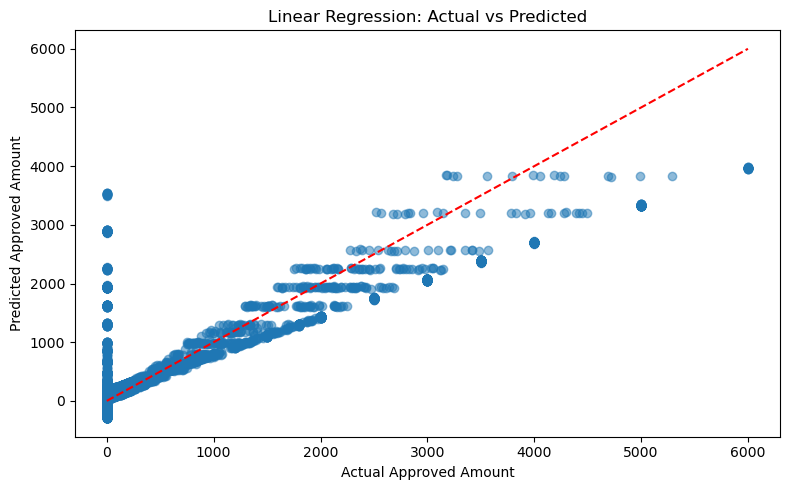

In [337]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, root_mean_squared_error
import matplotlib.pyplot as plt

query = """
SELECT 
    c.Claim_ID,
    c.Claim_Status,
    c.Claim_Status_Reason,
    c.Claim_Amount,
    c.Approved_Amount,
    c.Insurance_Provider_ID,
    c.Service_Billing_ID,
    sb.Service_Billing_Payment_Status
FROM Claim c
LEFT JOIN ServiceBilling sb ON c.Service_Billing_ID = sb.Service_Billing_ID
WHERE c.Approved_Amount IS NOT NULL;
"""

df = pd.read_sql_query(query, conn)

df_encoded = pd.get_dummies(df, columns=['Insurance_Provider_ID', 'Claim_Status', 'Claim_Status_Reason', 
                                         'Service_Billing_Payment_Status'], drop_first=True)

df_encoded = df_encoded.drop(columns=['Claim_ID', 'Service_Billing_ID'])

X = df_encoded.drop(columns=['Approved_Amount'])
y = df_encoded['Approved_Amount']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("R² Score:", r2_score(y_test, y_pred))
print("RMSE:", root_mean_squared_error(y_test, y_pred))

plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')  
plt.xlabel("Actual Approved Amount")
plt.ylabel("Predicted Approved Amount")
plt.title("Linear Regression: Actual vs Predicted")
plt.tight_layout()
plt.show()

**Results:**  
The linear regression model achieved an R² score of 0.71, meaning it was able to explain 71% of the variation in approved claim amounts using the available claim and billing data. This indicates a strong linear relationship between features like claim amount, insurance provider, billing status, and the final reimbursement received from insurers.

**Limitations:**  
The linear regression model assumes a linear relationship between inputs and the approved amount. However, real-world claim approvals may follow more complex, non-linear patterns influenced by insurance-specific rules, service type, or exceptional cases. This may limit the model’s accuracy in edge cases. Furthermore, while the model performs well overall, the average prediction error (£353) could be significant for lower-cost services. 

### Model 3: Patient Segmentation via Unsupervised Clustering

**Problem:**  
The NHS delivers care to a large and diverse patient population, but services are often planned without clear insight into how different patient groups engage with the system. It is difficult to tailor outreach, prioritise resources, or identify where specific groups cluster around certain hospitals or insurance providers. Currently, patients are treated as a generalised population, even though their preferences and behaviours vary significantly. 

**Solution:**  
I applied an unsupervised learning approach using K-Means clustering. The goal was to identify groups of patients who share similar demographic characteristics and service preferences — such as preferred hospital and insurance provider — in order to inform more targeted service planning. Each cluster represents a segment of patients with similar characteristics, allowing NHS planners to understand not just who their patients are, but how they interact with the healthcare system. 

**Justification:**  
Unsupervised clustering is well-suited to problems where the goal is to uncover hidden structure in the data without relying on labelled outcomes. K-Means clustering was chosen for its simplicity, scalability, and interpretability. It allows for the identification of patient segments that share common characteristics, helping NHS organisations better understand the composition of their service users. 

**Implementation:**  

In [340]:
from datetime import datetime
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

query = """
SELECT 
    Patient_ID,
    Patient_Gender,
    Patient_Date_Of_Birth,
    Patient_Preferred_Hospital_ID,
    Patient_Preferred_Insurance_Provider
FROM Patient
WHERE 
    Patient_Date_Of_Birth IS NOT NULL AND
    Patient_Gender IS NOT NULL AND
    Patient_Preferred_Hospital_ID IS NOT NULL AND
    Patient_Preferred_Insurance_Provider IS NOT NULL;
"""
df = pd.read_sql_query(query, conn)

df['Patient_Date_Of_Birth'] = pd.to_datetime(df['Patient_Date_Of_Birth'], errors='coerce')
df['Age'] = (pd.to_datetime("today") - df['Patient_Date_Of_Birth']).dt.days // 365
df = df.drop(columns=['Patient_Date_Of_Birth', 'Patient_ID'])

df['Gender'] = df['Patient_Gender'].map({'M': 1, 'F': 0})
df = df.drop(columns=['Patient_Gender'])
df_encoded = pd.get_dummies(df, columns=['Patient_Preferred_Hospital_ID', 'Patient_Preferred_Insurance_Provider'], drop_first=True)

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_encoded)

kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
df_encoded['Cluster'] = kmeans.fit_predict(scaled_data)
df_encoded['Age'] = df['Age']
df_encoded['Gender'] = df['Gender']

cluster_summary = df_encoded.groupby('Cluster').agg({
    'Age': 'mean',
    'Gender': 'mean',
    'Cluster': 'count'
}).rename(columns={'Gender': 'Mean_Male', 'Cluster': 'Patient_Count'})

print("Cluster Summary:")
print(cluster_summary)

hospital_cols = [col for col in df_encoded.columns if col.startswith('Patient_Preferred_Hospital_ID_')]
insurance_cols = [col for col in df_encoded.columns if col.startswith('Patient_Preferred_Insurance_Provider_')]

for cluster_id in df_encoded['Cluster'].unique():
    print(f"\nCluster {cluster_id} – Most common hospitals:")
    print(df_encoded[df_encoded['Cluster'] == cluster_id][hospital_cols].mean().sort_values(ascending=False).head(3))
    
    print(f"\nCluster {cluster_id} – Most common insurance providers:")
    print(df_encoded[df_encoded['Cluster'] == cluster_id][insurance_cols].mean().sort_values(ascending=False).head(3))

Cluster Summary:
               Age  Mean_Male  Patient_Count
Cluster                                     
0        54.251436   0.500580          67190
1        54.178749   0.504132           4235
2        54.602620   0.495059           4351
3        54.560409   0.507203           4304

Cluster 2 – Most common hospitals:
Patient_Preferred_Hospital_ID_H020    0.561020
Patient_Preferred_Hospital_ID_H180    0.026431
Patient_Preferred_Hospital_ID_H129    0.025741
dtype: float64

Cluster 2 – Most common insurance providers:
Patient_Preferred_Insurance_Provider_IP09    0.452769
Patient_Preferred_Insurance_Provider_IP35    0.017697
Patient_Preferred_Insurance_Provider_IP16    0.017237
dtype: float64

Cluster 0 – Most common hospitals:
Patient_Preferred_Hospital_ID_H180    0.056973
Patient_Preferred_Hospital_ID_H187    0.055857
Patient_Preferred_Hospital_ID_H147    0.055797
dtype: float64

Cluster 0 – Most common insurance providers:
Patient_Preferred_Insurance_Provider_IP34    0.027370
Patien

**Results:**  
The K-Means model successfully segmented the patient population into four distinct clusters, each showing different hospital and insurance preferences despite relatively similar average ages and gender balances:

Cluster 1 (4,235 patients): Strongly aligned with hospital H030 and insurance provider IP03. This tight alignment makes the cluster strategically important: NHS trusts could use this insight to negotiate more favourable reimbursement terms with IP03, leveraging the volume of patients concentrated around this pairing.

**Limitations:**  
While clustering provides valuable insight into patient groupings, this model is limited by the features used. Only age, gender, and preference data were included; it did not account for actual service usage, medical conditions, appointment frequency, or clinical outcomes, all of which could influence more meaningful segmentation. The model also required selecting the number of clusters in advance (k=4), which introduces subjectivity and may not reflect the true complexity of the patient population.

----
----